In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Data Preprocessing

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/BS/Machine Predictive Maintenance Classification/predictive_maintenance.csv")

In [ ]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
df.shape

(10000, 10)

In [ ]:
df.isnull().sum()

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0
Failure Type,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
df.drop(columns=['Product ID'],inplace=True)

In [ ]:
df.head()

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
df['Target'][df['Target']==1].count()

339

In [ ]:
df['Type'].value_counts()

,count
Type,
L,6000
M,2997
H,1003


In [ ]:
df[df['Type'] == "L"]["Target"].value_counts()

,count
Target,
0,5765
1,235


In [ ]:
df[df['Type'] == "M"]["Target"].value_counts()

,count
Target,
0,2914
1,83


In [ ]:
df[df['Type'] == "H"]["Target"].value_counts()

,count
Target,
0,982
1,21


In [ ]:
df.groupby(df["Type"])["Target"].mean()

,Target
Type,
H,0.020937
L,0.039167
M,0.027694


In [ ]:
df['Failure Type'].value_counts()

,count
Failure Type,
No Failure,9652
Heat Dissipation Failure,112
Power Failure,95
Overstrain Failure,78
Tool Wear Failure,45
Random Failures,18


In [ ]:
df["Target"].value_counts()

,count
Target,
0,9661
1,339


In [ ]:
UDI = df["UDI"].values

In [ ]:
UDI

array([    1,     2,     3, ...,  9998,  9999, 10000])

In [ ]:
df["Air temperature [K]"].value_counts()

,count
Air temperature [K],
300.7,279
298.9,231
297.4,230
300.5,229
298.8,227
...,...
304.4,7
296.0,6
295.4,3


In [ ]:
df["Process temperature [K]"].value_counts()

,count
Process temperature [K],
310.6,317
310.8,273
310.7,266
308.6,265
310.5,263
...,...
306.9,4
313.7,4
305.8,3


In [ ]:
df["Temperature"] = df["Process temperature [K]"] - df["Air temperature [K]"]

In [ ]:
df.head()

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature
0,1,M,298.1,308.6,1551,42.8,0,0,No Failure,10.5
1,2,L,298.2,308.7,1408,46.3,3,0,No Failure,10.5
2,3,L,298.1,308.5,1498,49.4,5,0,No Failure,10.4
3,4,L,298.2,308.6,1433,39.5,7,0,No Failure,10.4
4,5,L,298.2,308.7,1408,40.0,9,0,No Failure,10.5


In [ ]:
df.drop(columns=["UDI", "Air temperature [K]","Process temperature [K]"], inplace=True)

In [ ]:
df

,Type,Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature
0,M,1551,42.8,0,0,No Failure,10.5
1,L,1408,46.3,3,0,No Failure,10.5
2,L,1498,49.4,5,0,No Failure,10.4
3,L,1433,39.5,7,0,No Failure,10.4
4,L,1408,40.0,9,0,No Failure,10.5
...,...,...,...,...,...,...,...
9995,M,1604,29.5,14,0,No Failure,9.6
9996,H,1632,31.8,17,0,No Failure,9.5
9997,M,1645,33.4,22,0,No Failure,9.6
9998,H,1408,48.5,25,0,No Failure,9.7


In [ ]:
columns_to_standardize = ["Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]
scale = StandardScaler()
df[columns_to_standardize] = scale.fit_transform(df[columns_to_standardize])

In [ ]:
df.head()

,Type,Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature
0,M,0.068185,0.282200,-1.695984,0,No Failure,10.5
1,L,-0.729472,0.633308,-1.648852,0,No Failure,10.5
2,L,-0.227450,0.944290,-1.617430,0,No Failure,10.4
3,L,-0.590021,-0.048845,-1.586009,0,No Failure,10.4
4,L,-0.729472,0.001313,-1.554588,0,No Failure,10.5


# Data Visualization

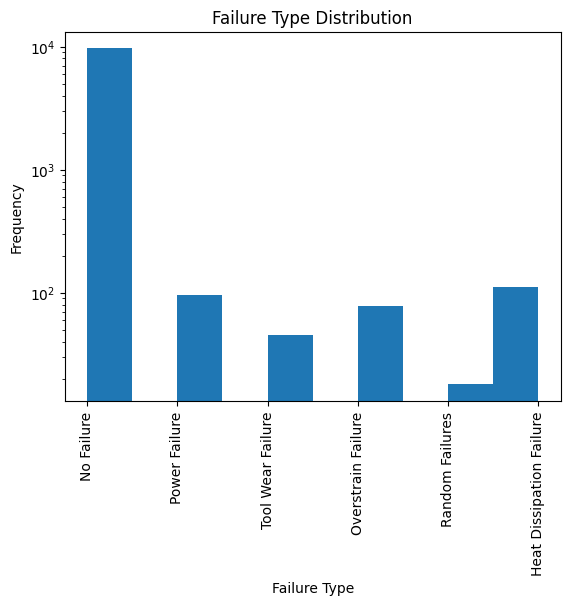

In [ ]:
plt.hist(df["Failure Type"],log=True)
plt.xticks(rotation=90)
plt.xlabel("Failure Type")
plt.ylabel("Frequency")
plt.title("Failure Type Distribution")
plt.show()

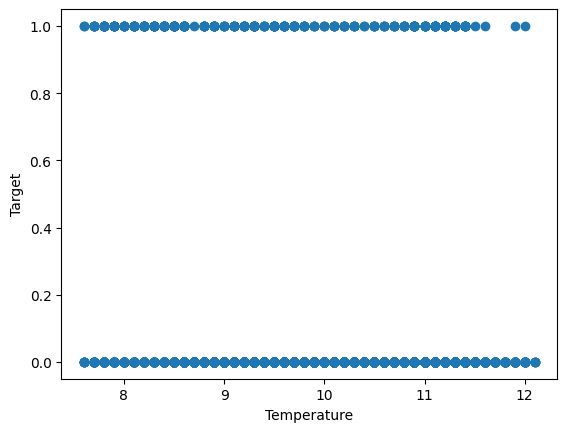

In [ ]:
plt.scatter(df["Temperature"], df["Target"])
plt.xlabel("Temperature")
plt.ylabel("Target")
plt.show()

# Encoding

In [ ]:
df = pd.get_dummies(df, columns=["Type", "Failure Type"], drop_first=True)

In [ ]:
df.head()

,Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Temperature,Type_L,Type_M,Failure Type_No Failure,Failure Type_Overstrain Failure,Failure Type_Power Failure,Failure Type_Random Failures,Failure Type_Tool Wear Failure
0,0.068185,0.282200,-1.695984,0,10.5,False,True,True,False,False,False,False
1,-0.729472,0.633308,-1.648852,0,10.5,True,False,True,False,False,False,False
2,-0.227450,0.944290,-1.617430,0,10.4,True,False,True,False,False,False,False
3,-0.590021,-0.048845,-1.586009,0,10.4,True,False,True,False,False,False,False
4,-0.729472,0.001313,-1.554588,0,10.5,True,False,True,False,False,False,False


In [ ]:
df.to_csv("preprocessed_data_machine_predictive_maintenance.csv", index=False)

In [ ]:
df.shape

(10000, 12)

# Model Training and Evaluation

---



---



In [ ]:
X = df.iloc[:, list(range(0,3)) + list(range(4,7))]
y = df.iloc[:, [3,7, 9, 10, 11]]

In [ ]:
X.head()

,Rotational speed [rpm],Torque [Nm],Tool wear [min],Temperature,Type_L,Type_M
0,0.068185,0.282200,-1.695984,10.5,False,True
1,-0.729472,0.633308,-1.648852,10.5,True,False
2,-0.227450,0.944290,-1.617430,10.4,True,False
3,-0.590021,-0.048845,-1.586009,10.4,True,False
4,-0.729472,0.001313,-1.554588,10.5,True,False


In [ ]:
y.head()

,Target,Failure Type_No Failure,Failure Type_Power Failure,Failure Type_Random Failures,Failure Type_Tool Wear Failure
0,0,True,False,False,False
1,0,True,False,False,False
2,0,True,False,False,False
3,0,True,False,False,False
4,0,True,False,False,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)